In [1]:
!pip install datasets  

from datasets import load_dataset

In [3]:
import pandas as pd

df = pd.read_json("metadata.jsonl", lines=True)
print(df.columns)  # Show column name
df.head()          # Show the first few rows


Index(['file_name', 'gender', 'annotation'], dtype='object')


file_name  gender                                         annotation
0  mp3/0.mp3    male  [{'annotator': 'a01', 'Coherence': 4.0, 'Music...
1  mp3/1.mp3    male  [{'annotator': 'a01', 'Coherence': 2.5, 'Music...
2  mp3/2.mp3    male  [{'annotator': 'a01', 'Coherence': 3.5, 'Music...
3  mp3/3.mp3    male  [{'annotator': 'a01', 'Coherence': 2.5, 'Music...
4  mp3/4.mp3  female  [{'annotator': 'a01', 'Coherence': 1.5, 'Music...

In [5]:
# Print one full annotation (not truncated)
import pprint
pprint.pprint(df['annotation'].iloc[0])


[{'Clarity': 4.5,
  'Coherence': 4.0,
  'Memorability': 4.0,
  'Musicality': 4.5,
  'Naturalness': 4.5,
  'annotator': 'a01'},
 {'Clarity': 4.0,
  'Coherence': 5.0,
  'Memorability': 4.0,
  'Musicality': 5.0,
  'Naturalness': 5.0,
  'annotator': 'a02'},
 {'Clarity': 4.0,
  'Coherence': 4.5,
  'Memorability': 4.0,
  'Musicality': 4.0,
  'Naturalness': 4.0,
  'annotator': 'a03'},
 {'Clarity': 3.5,
  'Coherence': 3.0,
  'Memorability': 3.5,
  'Musicality': 3.5,
  'Naturalness': 4.0,
  'annotator': 'a04'}]


In [10]:
print(len(df))


2399


In [11]:
!pip install tqdm

In [12]:
from tqdm.notebook import tqdm

params = ['Clarity', 'Coherence', 'Memorability', 'Musicality', 'Naturalness']

def true_flat_average(annots):
    if not annots:
        return None
    all_scores = []
    for a in annots:
        all_scores.extend([a[p] for p in params])
    return sum(all_scores) / len(all_scores)

df['avg_flat_score'] = [
    true_flat_average(annots) for annots in tqdm(df['annotation'])
]


  0%|          | 0/2399 [00:00<?, ?it/s]

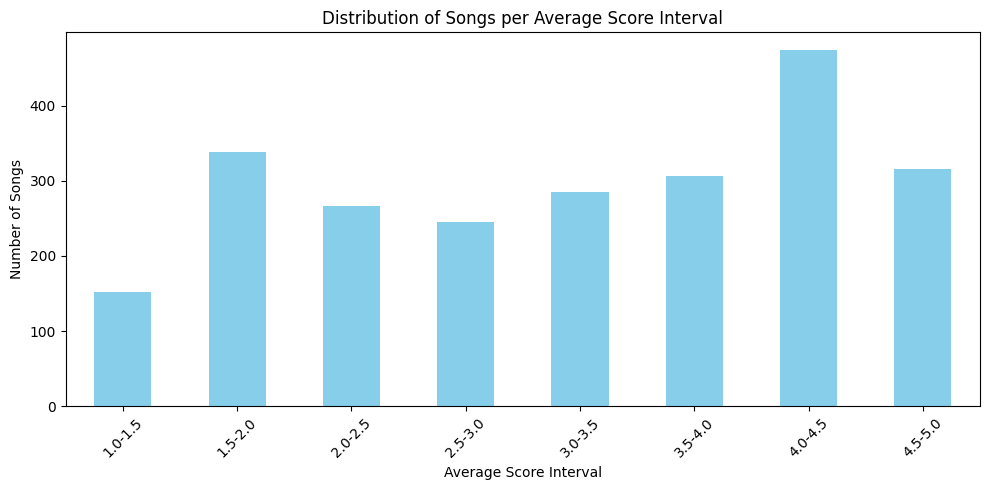

In [14]:
import numpy as np

# Define bins (edges: 1.0, 1.5, 2.0, ..., 5.0)
bins = np.arange(1, 5.5, 0.5)  # bins: [1.0-1.5), [1.5-2.0), ..., [4.5-5.0]
labels = [f"{b:.1f}-{b+0.5:.1f}" for b in bins[:-1]]
df['score_bin'] = pd.cut(df['avg_flat_score'], bins=bins, labels=labels, include_lowest=True, right=False)

score_counts = df['score_bin'].value_counts().sort_index()

plt.figure(figsize=(10,5))
score_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Songs per Average Score Interval')
plt.xlabel('Average Score Interval')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
